In [1]:
pip install category_encoders

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML/SBAnational.csv').reset_index(drop=True)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [5]:
df_full = df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [7]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,LoanNr_ChkDgt,899164,"[1000014003, 1000024006, 1000034009, 1000044001, 1000054004, 1000084002, 1000093009, 1000094005, 1000104006, 1000124001, 1000134004, 1000144007, 1000146010, 1000154010, 1000214004, 1000244002, 1000254005, 1000264008, 1000284003, 1000294006, 1000324002, 1000344008, 1000394001, 1000434000, 1000446006, 1000474001, 1000484004, 1000504008, 1000506000, 1000514000, 1000516003, 1000524003, 1000526006, 1000534006, 1000536009, 1000544009, 1000554001, 1000574007, 1000576010, 1000584010, 1000594002, 1000624009, 1000634001, 1000653000, 1000655003, 1000665006, 1000674002, 1000675009, 1000685001, 1000686008, 1000694008, 1000695004, 1000704009, 1000705005, 1000714001, 1000715008, 1000724004, 1000725000, 1000726007, 1000734007, 1000735003, 1000745006, 1000746002, 1000754002, 1000755009, 1000756005, 1000764005, 1000766008, 1000774008, 1000775004, 1000785007, 1000786003, 1000794003, 1000795010, 1000804004, 1000805000, 1000815003, 1000816010, 1000824010, 1000825006, 1000826002, 1000834002, 1000835009, 1000836005, 1000844005, 1000845001, 1000865007, 1000885002, 1000895005, 1000896001, 1000904010, 1000905006, 1000915009, 1000925001, 1000926008, 1000935004, 1000944000, 1000945007, 1000965002, 1000975005, ...]"
1,Name,779583,"[ABC HOBBYCRAFT, LANDMARK BAR & GRILLE (THE), WHITLOCK DDS, TODD M., BIG BUCKS PAWN & JEWELRY, LLC, ANASTASIA CONFECTIONS, INC., B&T SCREW MACHINE COMPANY, INC, MIDDLE ATLANTIC SPORTS CO INC, WEAVER PRODUCTS, TURTLE BEACH INN, INTEXT BUILDING SYS LLC, COMMERCIAL TRUCKING MAINTENANC, PROFESSIONAL ELEVATOR SERVICES, CARVEL, ORCHARD CAFE & BAKERY, INC., EBC INVESTMENTS LLC, ENVIRONMENTAL ROOFING SYSTEMS,, ARK MAMAGEMENT ENTERPRISES INC, FAIRFAX COURT SUBWAY, INC., FANTASTIC SAMS, SIR GOONY'S GOLF, ECONOLODGE OF DUMAS, YOUNG ACHIEVERS PRESCHOOL, INC, NICOLES RESTAURANT, TRIANGLE MACHINE & MFG., INC., SUBWAY, DEE'S CORNER BAIT & TACKLE, C & S TRANSIT, INC., HUNTERSBROOK STABLE, WEYLAND CORPORATION, SCROOGE'S SPIRIT, INC., CHICAGO BRICK UNLIMITED INC, AUDELIA FAMILY DENTAL GROUP, RZI, INC., PPP COMMUNICATIONS, HUTMACHER HOLDINGS INC, PRESTIGE LIMOUSINE SERVICE, PAUL E. & JUDY A. FAATZ, VILLAGE REST HOME, CORBIN CREEK GREENHOUSE, JFJ PROCESSORS, M.A.S. TRUCKING, INC., OLD LOUISVILLE INN, IRON HORSE FABRICATIONS, LARRY SCHOETTMER FORD INC, Sun Service Center, Dover Quality Foods, Inc., SNADER EXCAVATING AND TRUCKING, RAYMIES GROCERIES INC., ANYWHERE SPORTS PRODUCTIONS, SIMCO PRE-OWNED AUTO BROKERS, SPOTSYLVANIA TOTAL HEALTH, INC, Karl Duclos, WANAMAKERS MGMT., INC., Alan S. Budd D.M.D., P.C., HUGH GIBBONS PLUMBING AND HEAT, John Dailey, KR MENS CASUALS, Lined Valve Company Inc., NEW DIMENSION HOMES INC, CREATIVE COMMUNICATION OF KANS, Mykols Marine Inc., The Barber Agency Inc., ANGEL, MCCRANEY, INC., Grass Valley Market, B&B DIPNETS, LABELLE MARIEE, INC., LILY DAY GARDENS, ACADEMIE DE BALLET, INC., Larry P. Occhipinti, Baltazar Garza, MICHAEL GADEKEN DDS PC, STEVENSON PEST CONTROL, INC., Elie Baking Corp., STEPHANIE DEVELOPMENT, L.L.C., Regalia Bridal, Inc., Robert's Realty of Victor Inc., TULON PACIFIC LLC, AADVANTAGE INSURANCE & FINANCI, W L R Inc., GUADALAJARA DISTRIBUTORS, EXPRESSIONS HAIR, TANNING & NA, Birds Of A Feather, Inc., URBAN BEAST-SEATTLE LLC, WOODLAND PUBLISHING, INC, The Software Workbench, Inc., Squeegee Graphics, Inc., Steve Trujillo, C D Welch Jr., SHAFI SECURITY, FOODETTE, THE, Houssam Joudi, Christian Hinderer, Vincent Pilotta, TOUCHPOINTS MARKETING LLC, Hairline Inc., THE CAT'S MEOW, James & Sheryl Brower, KING'S GRANT RACQUET CLUB, INC, Garden Food Store, ...]"
2,City,32581,"[EVANSVILLE, NEW PARIS, BLOOMINGTON, BROKEN ARROW, ORLANDO, PLAINVILLE, UNION, SUMMERFIELD, PORT SAINT JOE, GLASTONBURY, CHARLOTTE, CHICAGO, APEX, SLATERSVILLE, WINSTON-SALEM, OKLAHOMA CITY, MIDLAND, CENTREVILLE, PLANO, KNOXVILLE, DUMAS, CORAL SPRINGS, JOHNSTON, EULESS, LITTLE ROCK, SAINT PETER, INDEPENDENCE, MARSHFIELD, CAMARILLO, ANDERSON, MIAMI, DALLAS, NEW ORLEANS, WASHIN

# DATA CLEANING

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df = df.drop(columns=['LoanNr_ChkDgt', 'Name', 'ChgOffPrinGr'])

In [10]:
for col in ['ApprovalDate', 'DisbursementDate']:
    df[col] = pd.to_datetime(df[col])

In [11]:
df = df.dropna(subset=['ApprovalFY'])
df['ApprovalFY'] = df['ApprovalFY'].str.rstrip('A')

In [12]:
df = df.dropna(subset=['ApprovalFY'])
df['ApprovalFY'] = df['ApprovalFY'].str.rstrip('A')

In [13]:
df['ApprovalFY'] = df['ApprovalFY'].astype(int)

In [14]:
def change_franchise(x):
    if (x == 1) | (x == 0):
        return 0
    else :
        return 1

df['FranchiseCode'] = df['FranchiseCode'].apply(lambda x: change_franchise(x))

## Missing Value

In [15]:
null = pd.DataFrame({'Missing Values' : df.isna().sum(), 'Percentage of Missing Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null[null['Missing Values'] > 0]

,Missing Values,Percentage of Missing Values
City,1,0.000763
Bank,165,0.125885
BankState,166,0.126648
RevLineCr,3947,3.011322
LowDoc,2,0.001526
ChgOffDate,115381,88.028717
DisbursementDate,135,0.102997
MIS_Status,204,0.155640


In [16]:
df = df.drop(columns=['ChgOffDate'])

In [17]:
df = df.dropna(subset=['DisbursementDate','MIS_Status'])

In [18]:
valid_values = ['Y', 'N', '0', '1']
df = df[df['RevLineCr'].isin(valid_values)].reset_index(drop=True)

In [19]:
df['RevLineCr'] = df['RevLineCr'].replace({'N': '0', 'Y': '1'})

In [20]:
for col in ['LowDoc', 'City', 'State', 'Bank', 'BankState']:
    mode_value = df[col].mode().iloc[0]
    df[col] = df[col].fillna(mode_value)

## Inconsistency Data

In [21]:
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', ''))
    return x

for col in ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']:
    df[col] = df[col].apply(clean_currency)

## Outlier

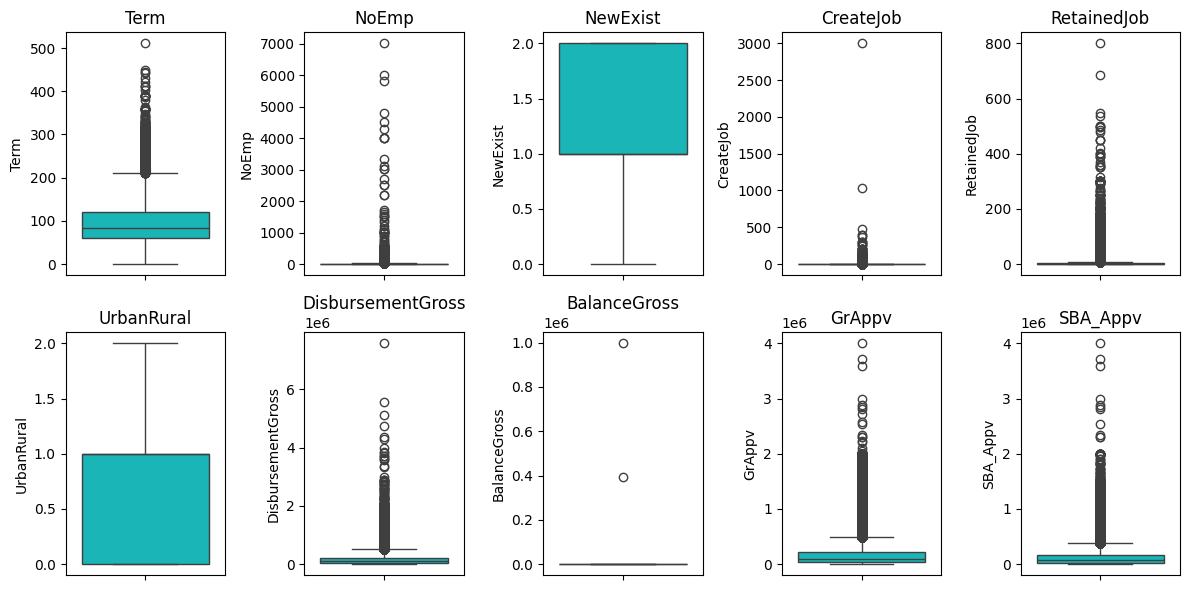

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

columns = ['Term','NoEmp','NewExist','CreateJob','RetainedJob','UrbanRural','DisbursementGross','BalanceGross','GrAppv','SBA_Appv']
for i, col in enumerate(columns):
    sns.boxplot(y=df[col], color='darkturquoise', ax=axes[i])
    axes[i].set_title(col, fontsize=12)

plt.tight_layout()
plt.show()

In [23]:
def Outliers_check(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    batas_bawah = q1 - limit
    batas_atas = q3 + limit
    print(f'batas_bawah: {batas_bawah}')
    print(f'batas_atas: {batas_atas}')

In [24]:
Outliers_check(df['CreateJob'])

IQR: 1.0
batas_bawah: -1.5
batas_atas: 2.5


In [25]:
df[df['CreateJob'] > 2.5].count()['CreateJob']

np.int64(17882)

In [26]:
df = df[(df['CreateJob'] <= 2.5)]

In [27]:
Outliers_check(df['NoEmp'])

IQR: 7.0
batas_bawah: -8.5
batas_atas: 19.5


In [28]:
df[df['NoEmp'] > 19.5].count()['NoEmp']

np.int64(11857)

In [29]:
df = df[(df['NoEmp'] <= 19.5)]

In [30]:
Outliers_check(df['RetainedJob'])

IQR: 2.0
batas_bawah: -3.0
batas_atas: 5.0


In [31]:
df[df['RetainedJob'] > 5.0].count()['RetainedJob']

np.int64(9420)

In [32]:
df = df[(df['RetainedJob'] <= 5.0)]

# EDA

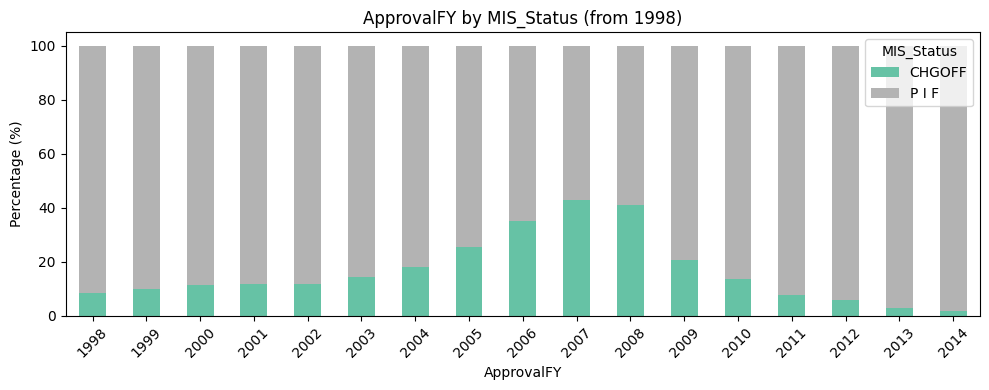

In [33]:
df_full['ApprovalFY'] = pd.to_numeric(df_full['ApprovalFY'], errors='coerce')
df_full = df_full.dropna(subset=['ApprovalFY'])
df_full['ApprovalFY'] = df_full['ApprovalFY'].astype(int)

grouped = df_full.groupby(['ApprovalFY', 'MIS_Status']).size().unstack(fill_value=0)
grouped = grouped.sort_index()

grouped = grouped[grouped.index >= 1998]

grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

grouped_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 4),
    colormap='Set2'
)

plt.title('ApprovalFY by MIS_Status (from 1998)')
plt.ylabel('Percentage (%)')
plt.xlabel('ApprovalFY')
plt.xticks(rotation=45)
plt.legend(title='MIS_Status', loc='upper right')
plt.tight_layout()
plt.show()


In [34]:
temp = []
for item in df['NAICS']:
    if item == 0 :
        temp.append(0)
    else :
        a = list(str(item))[:2]
        b = ''.join(a)
        temp.append(b)

df['NAICS'] = temp

In [35]:
df['NAICS'] = df['NAICS'].map({
    '11': 'Agriculture / Forestry / Fishing / Hunting',
    '21': 'Mining / Quarrying / Oil&Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale trade',
    '44': 'Retail trade',
    '45': 'Retail trade',
    '48': 'Transportation / Warehousing',
    '49': 'Transportation / Warehousing',
    '51': 'Information',
    '52': 'Finance / Insurance',
    '53': 'Real Estate / Rental / Leasing',
    '54': 'Proffesional / Scientific / Tech.Service',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative & Support / Waste Management / Remediation Services',
    '61': 'Educational',
    '62': 'Health Care / Social Assistance',
    '71': 'Arts / Entertainment / Recreation',
    '72': 'Accomodation / Food Services',
    '81': 'Other Services (except public admin)'
})

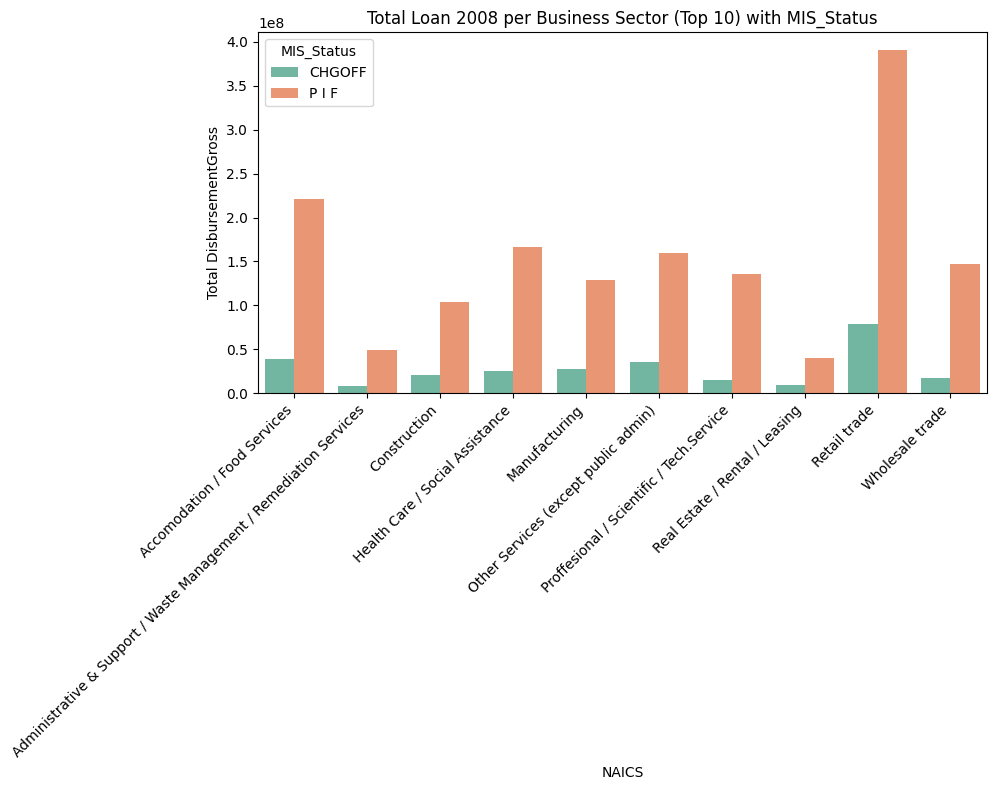

In [36]:
df_2005 = df[df['ApprovalFY'] == 2005]

total_loan_per_naics = df_2005.groupby(['NAICS', 'MIS_Status'])['DisbursementGross'].sum().reset_index()
top10_naics = total_loan_per_naics.groupby('NAICS')['DisbursementGross'].sum().nlargest(10).index
filtered_data = total_loan_per_naics[total_loan_per_naics['NAICS'].isin(top10_naics)]

plt.figure(figsize=(10,8))
sns.barplot(data=filtered_data, x='NAICS', y='DisbursementGross', hue='MIS_Status', palette='Set2')

plt.title('Total Loan 2008 per Business Sector (Top 10) with MIS_Status')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total DisbursementGross')
plt.xlabel('NAICS')

plt.tight_layout()
plt.show()


# ML Model

In [37]:
le = LabelEncoder()
df['MIS_Status'] = le.fit_transform(df['MIS_Status']) # PIF : 1, CHGOFF : 0

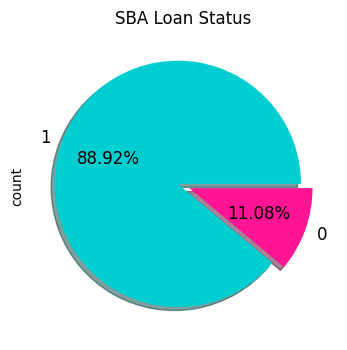

In [38]:
plt.figure(figsize=(4,4))
df['MIS_Status'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.2f%%', shadow=True, fontsize=12,colors=['darkturquoise','deeppink'])
plt.title('SBA Loan Status')
plt.show()

## Data Correlation for Numerical Type

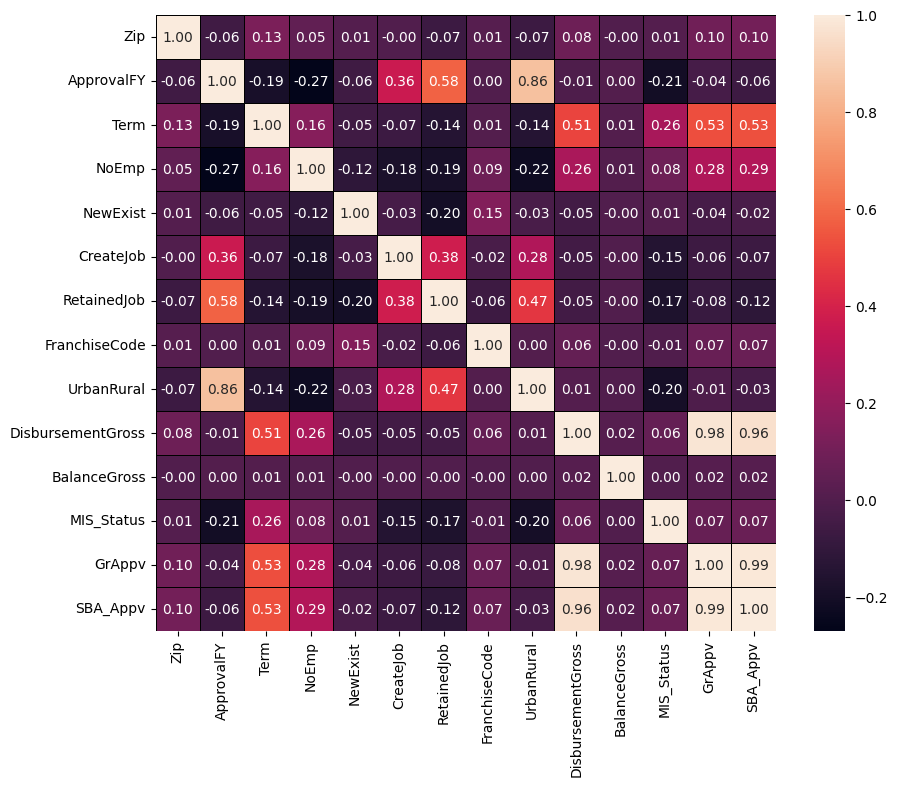

In [39]:
numeric_data = df.select_dtypes(include=['number'])
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(numeric_data.corr(), annot = True, linewidths=0.5,
            linecolor = "black", fmt = ".2f", ax = ax)
plt.show()

In [40]:
abs(numeric_data.corr(method='pearson')['MIS_Status']).sort_values(ascending=False)

,MIS_Status
MIS_Status,1.000000
Term,0.256046
ApprovalFY,0.210752
UrbanRural,0.201082
RetainedJob,0.168017
CreateJob,0.149519
NoEmp,0.083554
SBA_Appv,0.074240
GrAppv,0.066624
DisbursementGross,0.059685


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

num2 = numeric_data.copy()
num2 =  num2.drop(['MIS_Status'], axis=1)

vif_data = pd.DataFrame()
vif_data['Feature'] = num2.columns

vif_data["VIF"] = [variance_inflation_factor(num2.values, i)
                          for i in range(len(num2.columns))]

print(vif_data)

              Feature         VIF
0                 Zip    4.128322
1          ApprovalFY   19.657440
2                Term    4.486617
3               NoEmp    2.709160
4            NewExist    9.889088
5           CreateJob    1.360779
6         RetainedJob    2.060267
7       FranchiseCode    1.098090
8          UrbanRural    2.334068
9   DisbursementGross   38.252881
10       BalanceGross    1.000340
11             GrAppv  111.160486
12           SBA_Appv   65.457370


In [42]:
df.drop(columns=['GrAppv'], inplace=True)

In [43]:
df.drop(columns=['ApprovalFY'], inplace=True)

In [44]:
df.drop(columns=['SBA_Appv'], inplace=True)

In [45]:
numeric_data = df.select_dtypes(include=['number'])
from statsmodels.stats.outliers_influence import variance_inflation_factor

num2 = numeric_data.copy()
num2 =  num2.drop(['MIS_Status'], axis=1)

vif_data = pd.DataFrame()
vif_data['Feature'] = num2.columns

vif_data["VIF"] = [variance_inflation_factor(num2.values, i)
                          for i in range(len(num2.columns))]

print(vif_data)

             Feature       VIF
0                Zip  3.576019
1               Term  3.849416
2              NoEmp  2.283885
3           NewExist  4.355362
4          CreateJob  1.357985
5        RetainedJob  1.837592
6      FranchiseCode  1.089860
7         UrbanRural  2.234106
8  DisbursementGross  2.156829
9       BalanceGross  1.000328


## Encoding

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86046 entries, 1 to 125203
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   City               86046 non-null  object        
 1   State              86046 non-null  object        
 2   Zip                86046 non-null  int64         
 3   Bank               86046 non-null  object        
 4   BankState          86046 non-null  object        
 5   NAICS              60460 non-null  object        
 6   ApprovalDate       86046 non-null  datetime64[ns]
 7   Term               86046 non-null  int64         
 8   NoEmp              86046 non-null  int64         
 9   NewExist           86046 non-null  float64       
 10  CreateJob          86046 non-null  int64         
 11  RetainedJob        86046 non-null  int64         
 12  FranchiseCode      86046 non-null  int64         
 13  UrbanRural         86046 non-null  int64         
 14  RevLineCr 

In [47]:
X = df.drop(columns=['MIS_Status','ApprovalDate','DisbursementDate'])
y = df['MIS_Status']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print(X_train.shape, X_test.shape)

(68836, 17) (17210, 17)


In [50]:
binary_pipeline = Pipeline([
    ('binary', ce.BinaryEncoder())
])

In [51]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown = 'ignore'), ['NAICS', 'RevLineCr','LowDoc']),
    ('Binary', ce.BinaryEncoder(), ['City','State','Bank','BankState'])
], remainder='passthrough')

In [52]:
X_train_transformed = transformer.fit_transform(X_train, y_train)
X_test_transformed = transformer.transform(X_test)

In [53]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

In [54]:
feature_names = transformer.get_feature_names_out()
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)

In [55]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42)
}


for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"=== {name} ===")
    print(f"Akurasi: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*40 + "\n")

=== Logistic Regression ===
Akurasi: 0.9041
              precision    recall  f1-score   support

           0       0.71      0.25      0.37      1936
           1       0.91      0.99      0.95     15274

    accuracy                           0.90     17210
   macro avg       0.81      0.62      0.66     17210
weighted avg       0.89      0.90      0.88     17210


----------------------------------------

=== K-Nearest Neighbors ===
Akurasi: 0.9034
              precision    recall  f1-score   support

           0       0.67      0.28      0.40      1936
           1       0.92      0.98      0.95     15274

    accuracy                           0.90     17210
   macro avg       0.79      0.63      0.67     17210
weighted avg       0.89      0.90      0.89     17210


----------------------------------------

=== Decision Tree ===
Akurasi: 0.9308
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1936
           1       0.96  

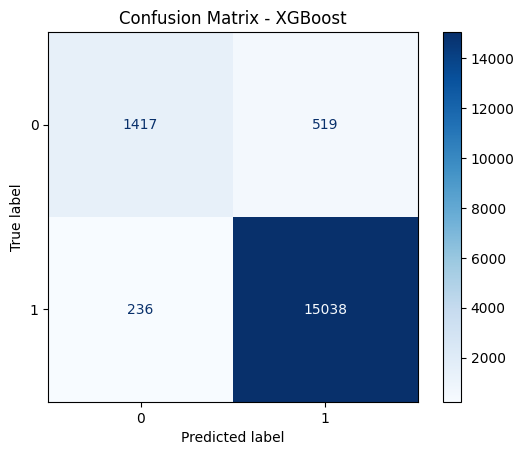

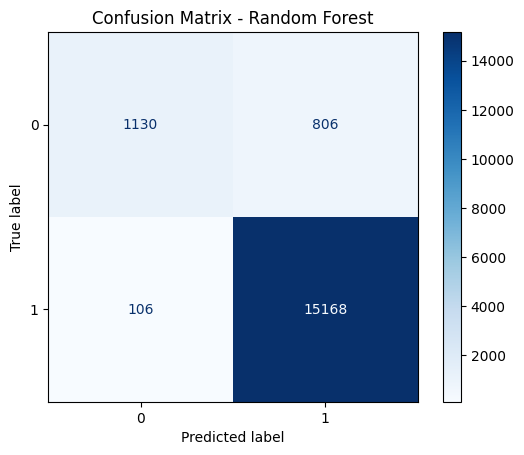

In [56]:
xgb = XGBClassifier()
rf = RandomForestClassifier(random_state=42)

xgb.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Confusion Matrix
def plot_conf_matrix(model, X, y, model_name):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_conf_matrix(xgb, X_test_scaled, y_test, "XGBoost")
plot_conf_matrix(rf, X_test_scaled, y_test, "Random Forest")

In [57]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline # SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

model = XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1936
           1       0.97      0.98      0.98     15274

    accuracy                           0.96     17210
   macro avg       0.91      0.87      0.89     17210
weighted avg       0.96      0.96      0.96     17210



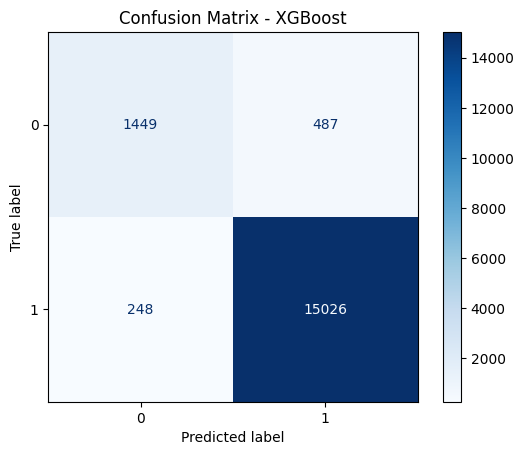

In [58]:
plot_conf_matrix(model, X_test_scaled, y_test, "XGBoost")

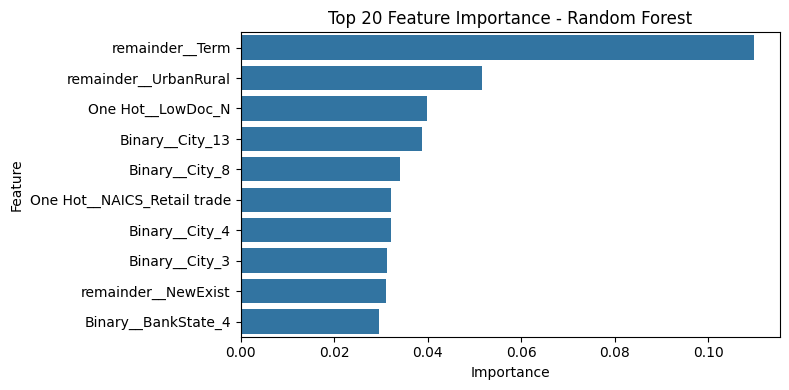

In [59]:
importances = model.feature_importances_
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 5
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10))
plt.title("Top 20 Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

# Economic Impact

In [60]:
df_full['ChgOffPrinGr'] = (
    df_full['ChgOffPrinGr']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
    .astype(int)
)

In [61]:
salah_prediksi_idx = y_test != y_pred

In [62]:
index_salah = X_test[salah_prediksi_idx].index

In [63]:
total_kerugian = df_full.loc[index_salah, 'ChgOffPrinGr'].sum()

print("Total kerugian dari salah prediksi:", total_kerugian)

Total kerugian dari salah prediksi: 9273763
